In [ ]:
# pip install -U numpy

In [2]:
import numpy as np 
import pandas as pd 
import numpy.ma as ma
import sys
sys.path.append('/home/costa/JoaoModelsForAlicante/utils')
import operator_calculations as op_calc
import stats
import delay_embedding as embed
import clustering_methods as cl

In [3]:
df = pd.read_csv('data_autobus.csv')

In [4]:
Values = df['Values'].values

In [5]:
import numpy.ma as ma

In [6]:
X = ma.masked_invalid(Values).reshape(-1,1)

In [7]:
X.shape

(20784, 1)

In [8]:
X1 = ma.masked_invalid(Values[:500]).reshape(-1,1)

In [9]:
import matplotlib.pyplot as plt

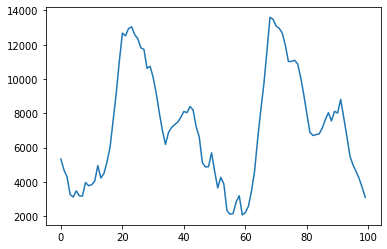

In [10]:
X.shape
plt.plot(X[:100])

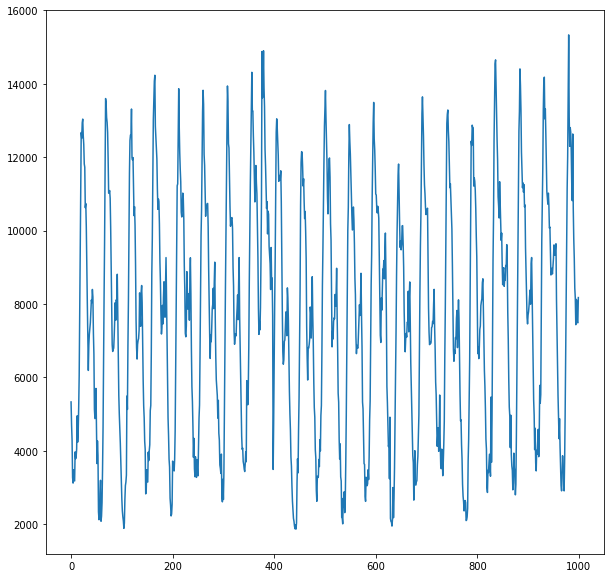

In [11]:
plt.figure(figsize=(10,10))
plt.plot(X[:1000])
plt.show()

In [12]:
#to get error estimates in the manuscript we split the trajectory into non-overlapping segments

n_seed_range=np.arange(25,210,25) #number of partitions to examine
range_Ks =  np.arange(1,100,dtype=int) #range of delays to study
h_K=np.zeros((len(range_Ks),len(n_seed_range)))
for k,K in enumerate(range_Ks):
    traj_matrix = embed.trajectory_matrix(X,K=K-1)
    for ks,n_seeds in enumerate(n_seed_range):
        labels=cl.kmeans_knn_partition(traj_matrix,n_seeds)
        h = op_calc.get_entropy(labels)
        h_K[k,ks]=h
        print('Computed for {} delays and {} seeds.'.format(K,n_seeds))

Computed for 1 delays and 25 seeds.
Computed for 1 delays and 50 seeds.
Computed for 1 delays and 75 seeds.
Computed for 1 delays and 100 seeds.
Computed for 1 delays and 125 seeds.
Computed for 1 delays and 150 seeds.
Computed for 1 delays and 175 seeds.
Computed for 1 delays and 200 seeds.
Computed for 2 delays and 25 seeds.
Computed for 2 delays and 50 seeds.
Computed for 2 delays and 75 seeds.
Computed for 2 delays and 100 seeds.
Computed for 2 delays and 125 seeds.
Computed for 2 delays and 150 seeds.
Computed for 2 delays and 175 seeds.
Computed for 2 delays and 200 seeds.
Computed for 3 delays and 25 seeds.
Computed for 3 delays and 50 seeds.
Computed for 3 delays and 75 seeds.
Computed for 3 delays and 100 seeds.
Computed for 3 delays and 125 seeds.
Computed for 3 delays and 150 seeds.
Computed for 3 delays and 175 seeds.
Computed for 3 delays and 200 seeds.
Computed for 4 delays and 25 seeds.
Computed for 4 delays and 50 seeds.
Computed for 4 delays and 75 seeds.
Computed for 

Computed for 28 delays and 125 seeds.
Computed for 28 delays and 150 seeds.
Computed for 28 delays and 175 seeds.
Computed for 28 delays and 200 seeds.
Computed for 29 delays and 25 seeds.
Computed for 29 delays and 50 seeds.
Computed for 29 delays and 75 seeds.
Computed for 29 delays and 100 seeds.
Computed for 29 delays and 125 seeds.
Computed for 29 delays and 150 seeds.
Computed for 29 delays and 175 seeds.
Computed for 29 delays and 200 seeds.
Computed for 30 delays and 25 seeds.
Computed for 30 delays and 50 seeds.
Computed for 30 delays and 75 seeds.
Computed for 30 delays and 100 seeds.
Computed for 30 delays and 125 seeds.
Computed for 30 delays and 150 seeds.
Computed for 30 delays and 175 seeds.
Computed for 30 delays and 200 seeds.
Computed for 31 delays and 25 seeds.
Computed for 31 delays and 50 seeds.
Computed for 31 delays and 75 seeds.
Computed for 31 delays and 100 seeds.
Computed for 31 delays and 125 seeds.
Computed for 31 delays and 150 seeds.
Computed for 31 delay

Computed for 55 delays and 175 seeds.
Computed for 55 delays and 200 seeds.
Computed for 56 delays and 25 seeds.
Computed for 56 delays and 50 seeds.
Computed for 56 delays and 75 seeds.
Computed for 56 delays and 100 seeds.
Computed for 56 delays and 125 seeds.
Computed for 56 delays and 150 seeds.
Computed for 56 delays and 175 seeds.
Computed for 56 delays and 200 seeds.
Computed for 57 delays and 25 seeds.
Computed for 57 delays and 50 seeds.
Computed for 57 delays and 75 seeds.
Computed for 57 delays and 100 seeds.
Computed for 57 delays and 125 seeds.
Computed for 57 delays and 150 seeds.
Computed for 57 delays and 175 seeds.
Computed for 57 delays and 200 seeds.
Computed for 58 delays and 25 seeds.
Computed for 58 delays and 50 seeds.
Computed for 58 delays and 75 seeds.
Computed for 58 delays and 100 seeds.
Computed for 58 delays and 125 seeds.
Computed for 58 delays and 150 seeds.
Computed for 58 delays and 175 seeds.
Computed for 58 delays and 200 seeds.
Computed for 59 delay

Computed for 83 delays and 25 seeds.
Computed for 83 delays and 50 seeds.
Computed for 83 delays and 75 seeds.
Computed for 83 delays and 100 seeds.
Computed for 83 delays and 125 seeds.
Computed for 83 delays and 150 seeds.
Computed for 83 delays and 175 seeds.
Computed for 83 delays and 200 seeds.
Computed for 84 delays and 25 seeds.
Computed for 84 delays and 50 seeds.
Computed for 84 delays and 75 seeds.
Computed for 84 delays and 100 seeds.
Computed for 84 delays and 125 seeds.
Computed for 84 delays and 150 seeds.
Computed for 84 delays and 175 seeds.
Computed for 84 delays and 200 seeds.
Computed for 85 delays and 25 seeds.
Computed for 85 delays and 50 seeds.
Computed for 85 delays and 75 seeds.
Computed for 85 delays and 100 seeds.
Computed for 85 delays and 125 seeds.
Computed for 85 delays and 150 seeds.
Computed for 85 delays and 175 seeds.
Computed for 85 delays and 200 seeds.
Computed for 86 delays and 25 seeds.
Computed for 86 delays and 50 seeds.
Computed for 86 delays 

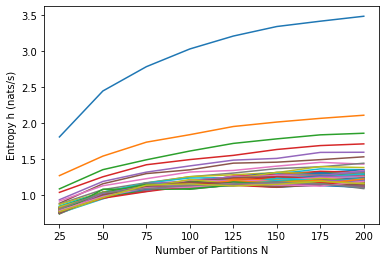

In [13]:
plt.plot(n_seed_range,h_K.T)
plt.xlabel('Number of Partitions N', fontsize = 10)
plt.ylabel('Entropy h (nats/s)', fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('Entropy.jpg')
plt.show()

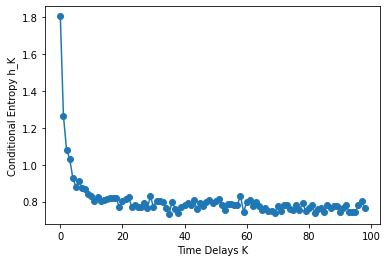

In [14]:
plt.plot(h_K[:,0],marker='o')
plt.xlabel('Time Delays K', fontsize = 10)
plt.ylabel('Conditional Entropy h_K', fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('ConditionalEntropy.jpg')
plt.show()

In [15]:
X[1000:5000].shape

(4000, 1)

In [16]:
embedding = embed.embed_tseries_pca(X[9000:10000], 24, return_modes=True, part_ratio=False)

In [17]:
embedding

(array([1.31395112e+08, 1.06725634e+08, 3.03307426e+07, 1.45071435e+07,
        7.12702515e+06, 3.62481919e+06, 8.23680605e+05, 7.02190864e+05,
        5.13981250e+05, 4.51894840e+05, 4.27044149e+05, 2.92244674e+05,
        1.12862444e+05, 1.30594798e+05, 1.22194156e+05, 1.23187394e+05,
        1.49555023e+05, 1.94445256e+05, 2.52469772e+05, 2.49324371e+05,
        2.34105026e+05, 2.24525883e+05, 2.17956671e+05, 2.21582542e+05,
        2.19784921e+05]),
 array([[ 2.08668431e-01,  2.21170113e-02,  2.78618814e-01,
          3.05125250e-01,  2.92886095e-01,  4.01764318e-01,
          2.50248903e-01,  1.95676650e-01,  3.23699384e-01,
          1.17041537e-01, -2.46470459e-01, -2.97183744e-01,
         -1.13998914e-01,  1.24900125e-01,  5.97561875e-02,
         -3.17149645e-02,  1.04463103e-01,  1.89707131e-01,
         -6.67016999e-02,  1.02205407e-01, -2.19798026e-01,
          7.32674803e-02, -1.13232770e-01, -7.49460826e-02,
         -4.99518249e-02],
        [ 2.23133098e-01, -8.920272

In [18]:
embedding[0]

array([1.31395112e+08, 1.06725634e+08, 3.03307426e+07, 1.45071435e+07,
       7.12702515e+06, 3.62481919e+06, 8.23680605e+05, 7.02190864e+05,
       5.13981250e+05, 4.51894840e+05, 4.27044149e+05, 2.92244674e+05,
       1.12862444e+05, 1.30594798e+05, 1.22194156e+05, 1.23187394e+05,
       1.49555023e+05, 1.94445256e+05, 2.52469772e+05, 2.49324371e+05,
       2.34105026e+05, 2.24525883e+05, 2.17956671e+05, 2.21582542e+05,
       2.19784921e+05])

In [19]:
embedding[1]

array([[ 2.08668431e-01,  2.21170113e-02,  2.78618814e-01,
         3.05125250e-01,  2.92886095e-01,  4.01764318e-01,
         2.50248903e-01,  1.95676650e-01,  3.23699384e-01,
         1.17041537e-01, -2.46470459e-01, -2.97183744e-01,
        -1.13998914e-01,  1.24900125e-01,  5.97561875e-02,
        -3.17149645e-02,  1.04463103e-01,  1.89707131e-01,
        -6.67016999e-02,  1.02205407e-01, -2.19798026e-01,
         7.32674803e-02, -1.13232770e-01, -7.49460826e-02,
        -4.99518249e-02],
       [ 2.23133098e-01, -8.92027273e-03,  2.99105107e-01,
         2.63896098e-01,  2.52312323e-01,  1.74226500e-01,
         1.36033628e-01,  4.55327818e-02,  2.45827178e-02,
        -1.73684628e-03,  1.14480418e-01,  2.39391718e-01,
         2.96669379e-01, -2.37256499e-01, -1.32392877e-01,
         4.96469639e-02, -2.38493972e-01, -4.29643130e-01,
         1.65707168e-02, -9.10894887e-02,  2.85204714e-01,
        -1.50080673e-01,  2.47287134e-01,  1.53393305e-01,
         5.02381620e-02],
    

In [20]:
embedding[2].shape

(1000, 10)

In [21]:
import matplotlib.pyplot as plt

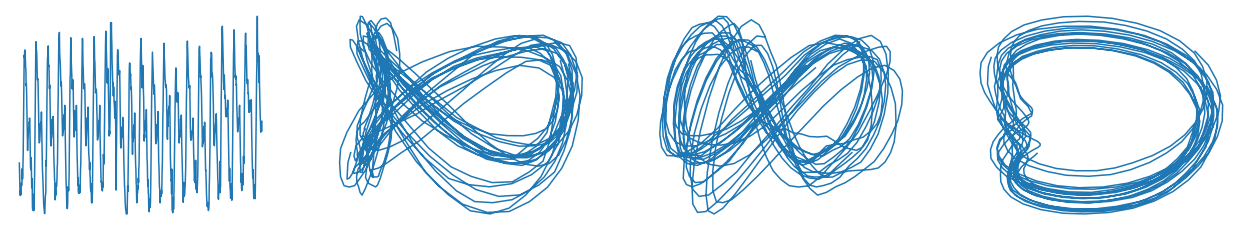

In [22]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(22, 4))
ax[0].plot(X[:1000])
ax[0].set_axis_off()
ax[3].plot(embedding[2][:,0], embedding[2][:,1])
ax[3].set_axis_off()
ax[1].plot(embedding[2][:,0], embedding[2][:,2])
ax[1].set_axis_off()
ax[2].plot(embedding[2][:,1], embedding[2][:,2])
ax[2].set_axis_off()
plt.savefig('atractor.jpg')